# Extension 4 - Overfitting


- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

In [26]:
# Importing the required stuff

import os
import random
import numpy as np
import matplotlib.pyplot as plt

from data import Data
from linear_regression import LinearRegression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Running polynomial regression on the tips.csv dataset

A possible hypothesis for running linear regression on the given dataset using only the independent variable "total bill"  and the dependent variable "tip" could be:

"There is a linear relationship between the total bill of a dining party and the amount of tip they leave. Specifically, as the total bill of the dining party increase, the tip amount will also increase."

To test this hypothesis, we could run a simple linear regression with tip as the dependent variable and total bill as the independent variable. The regression analysis would provide us with coefficients that represent the strength and direction of the relationships between the independent variable and the dependent variable. We could use the coefficients to make predictions about the tip amount based on the total bill of the dining party.

In [27]:
# Storing the filename for the tips.csv file
tips_filename = os.path.join('data', 'tips.csv')

# Loading the data
tips_data = Data(tips_filename)

# Printing the data
print(tips_data)

# Creating a linear regression object
tips_reg = LinearRegression(tips_data)

data/tips.csv (244x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/244 rows.
16.99	1.01	2.0	
10.34	1.66	3.0	
21.01	3.5	3.0	
23.68	3.31	2.0	
24.59	3.61	4.0	



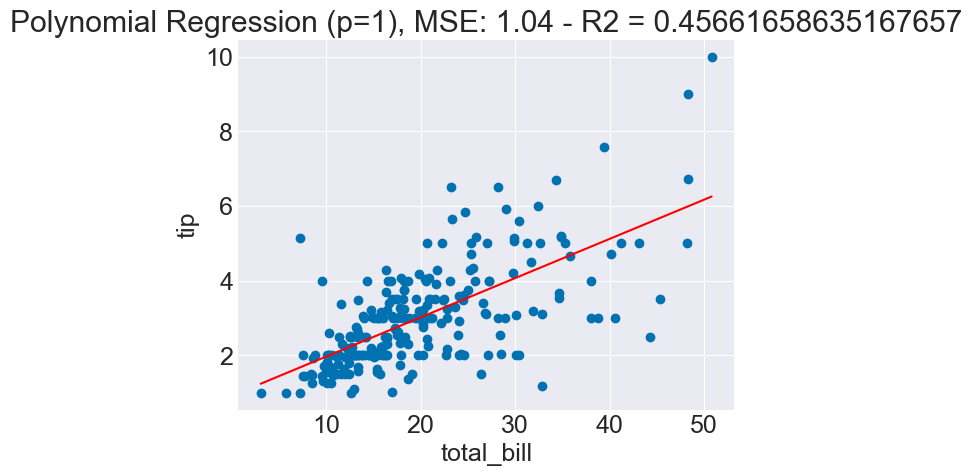

MSE: 1.0360194420113769
R^2: 0.45661658635167657


In [28]:
# Fitting the tips data using a polynomial of degree 1 with tip as the dependent variable and the total bill as the independent variable
tips_reg.linear_regression(ind_vars = ['total_bill'], dep_var = 'tip', p = 1)

# Use scatter of the regression data
tips_reg.scatter('total_bill', 'tip', f'Polynomial Regression (p=1), MSE: {tips_reg.mse:.2f}')

# print out the mse 
print(f'MSE: {tips_reg.mse}')
# Print the r^2 value
print(f'R^2: {tips_reg.R2}')

## Running polynomial regression with high degree polynomials

In [29]:
# Splitting the data into training and testing sets
filename = 'data/tips.csv'
tips_data_fit = Data(filename)
tips_data_validate = Data(filename)
tips_data_fit.limit_samples(1, 120)
tips_data_validate.limit_samples(120, 240)

print(tips_data_fit)
print(tips_data_validate)

data/tips.csv (119x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/119 rows.
10.34	1.66	3.0	
21.01	3.5	3.0	
23.68	3.31	2.0	
24.59	3.61	4.0	
25.29	4.71	4.0	

data/tips.csv (120x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/120 rows.
11.69	2.31	2.0	
13.42	1.68	2.0	
14.26	2.5	2.0	
15.95	2.0	2.0	
12.48	2.52	2.0	



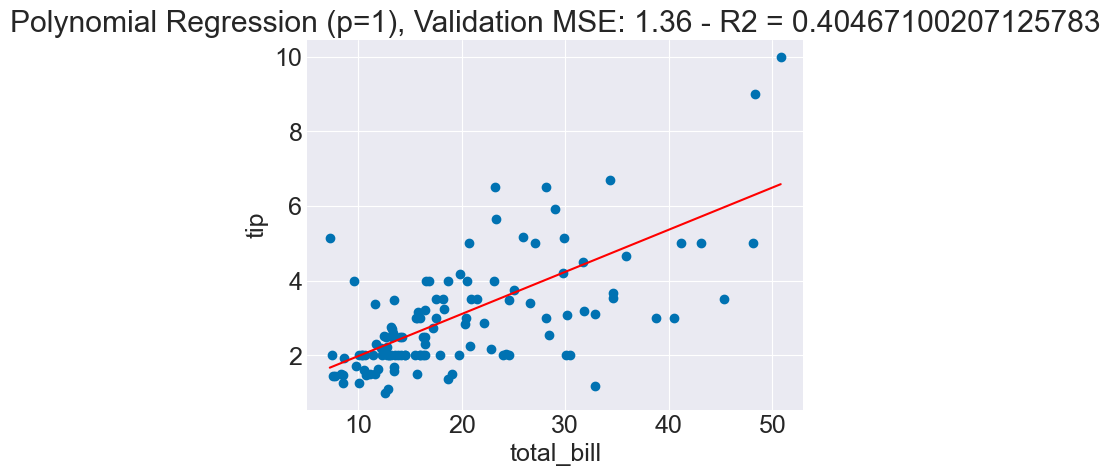

p = 1
Fit MSE: 0.693600337296534
Validation MSE: 1.360963497704294
Delta MSE: -0.6673631604077599



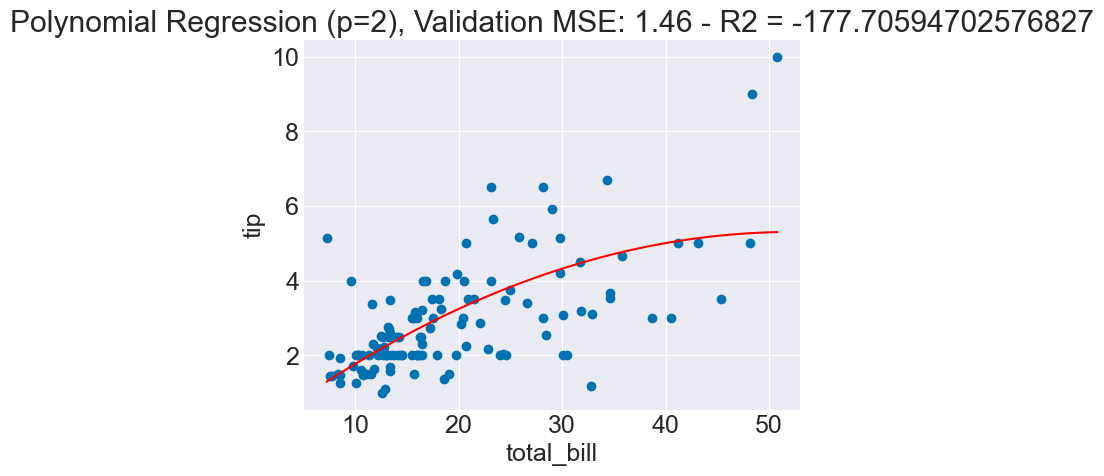

p = 2
Fit MSE: 0.6565242199605074
Validation MSE: 1.4581800891642738
Delta MSE: -0.8016558692037664



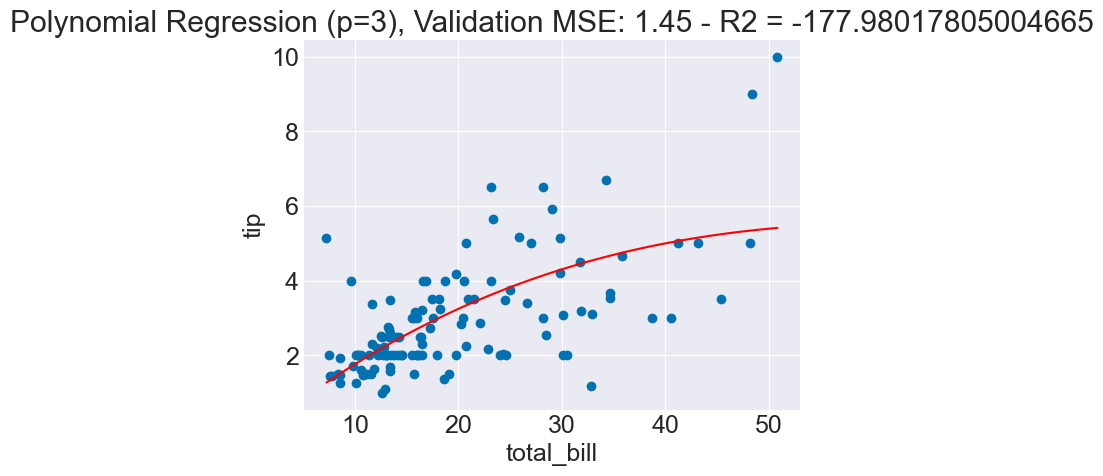

p = 3
Fit MSE: 0.6563739979805222
Validation MSE: 1.445431763190366
Delta MSE: -0.7890577652098437



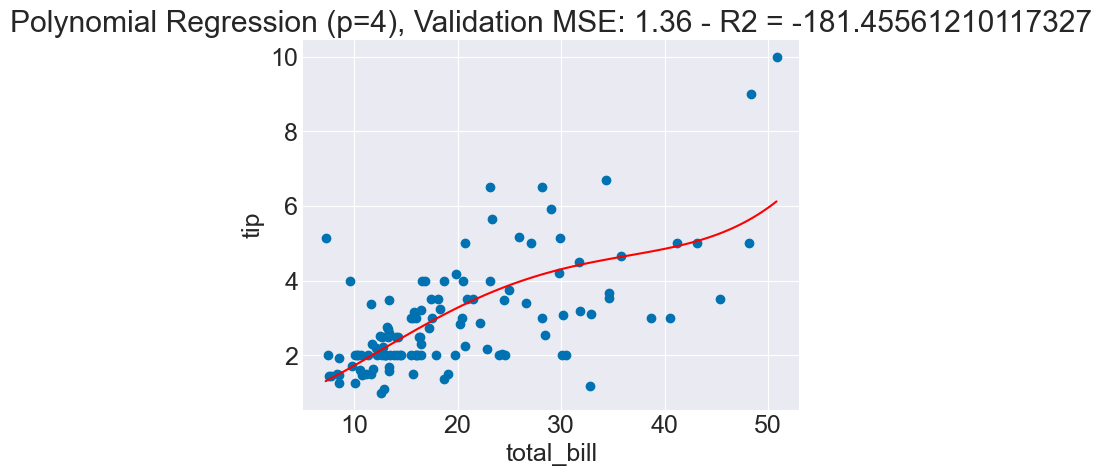

p = 4
Fit MSE: 0.6522632191917523
Validation MSE: 1.3626415813598565
Delta MSE: -0.7103783621681041



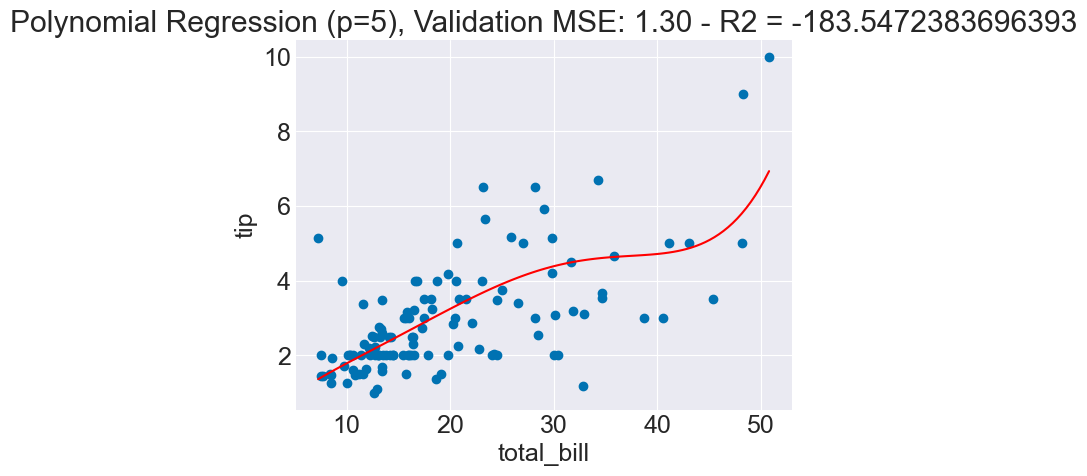

p = 5
Fit MSE: 0.6494004696364808
Validation MSE: 1.301231558259468
Delta MSE: -0.6518310886229872



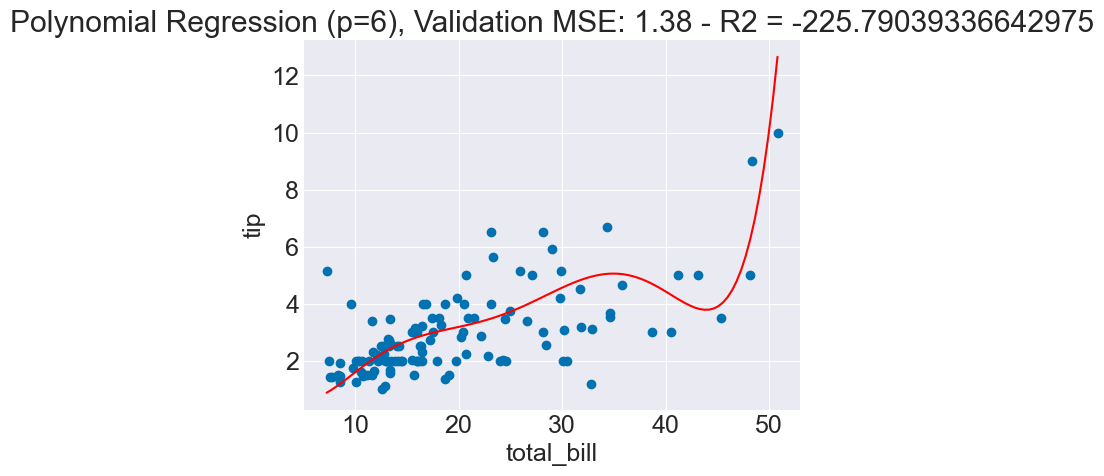

p = 6
Fit MSE: 0.5993224931778015
Validation MSE: 1.3834802267199928
Delta MSE: -0.7841577335421913



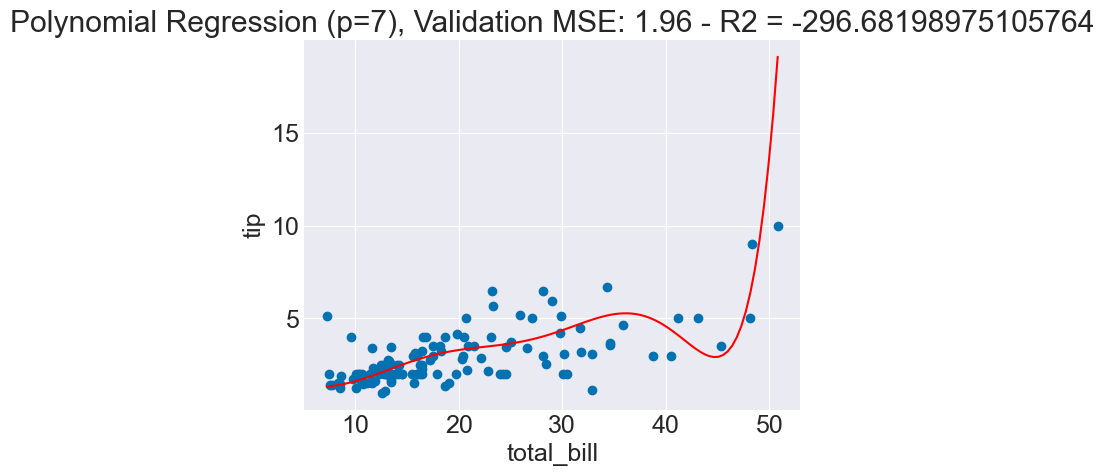

p = 7
Fit MSE: 0.5749414448433993
Validation MSE: 1.9596800721082264
Delta MSE: -1.3847386272648272



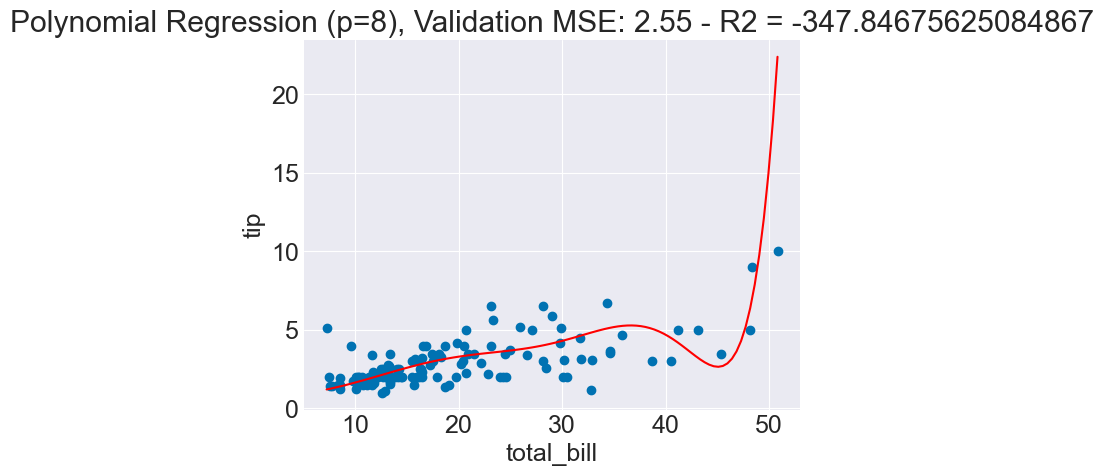

p = 8
Fit MSE: 0.5727540376658017
Validation MSE: 2.5504775734793688
Delta MSE: -1.977723535813567



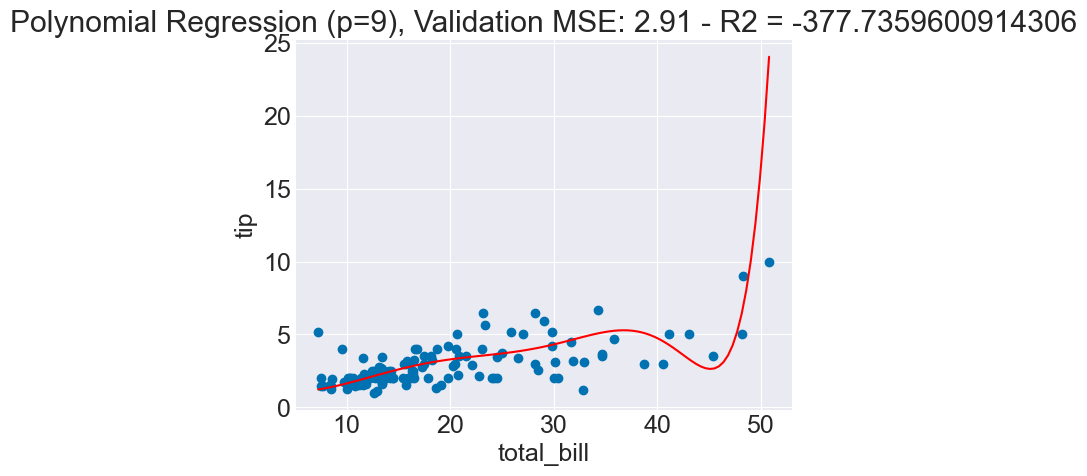

p = 9
Fit MSE: 0.5727346264172422
Validation MSE: 2.9112349665134634
Delta MSE: -2.338500340096221



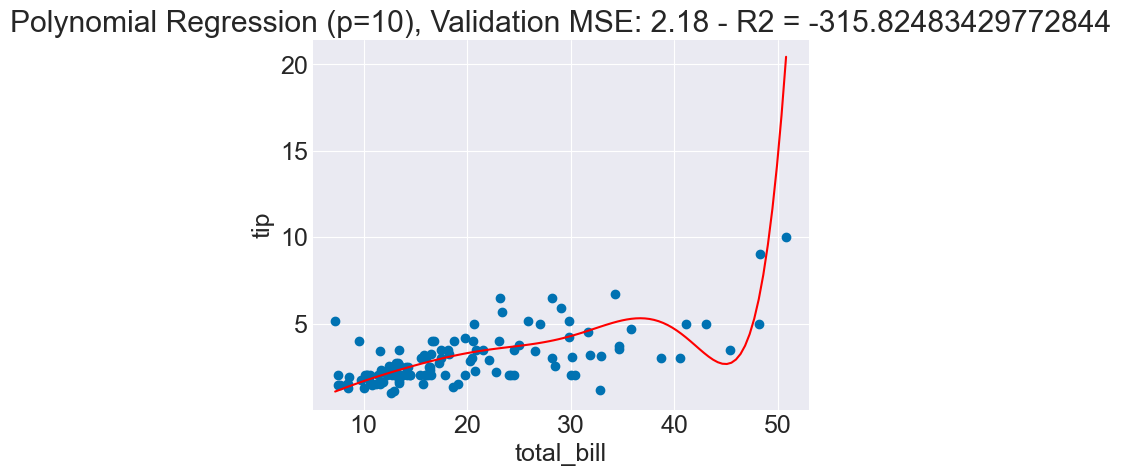

p = 10
Fit MSE: 0.580269922865871
Validation MSE: 2.18390145363591
Delta MSE: -1.6036315307700388



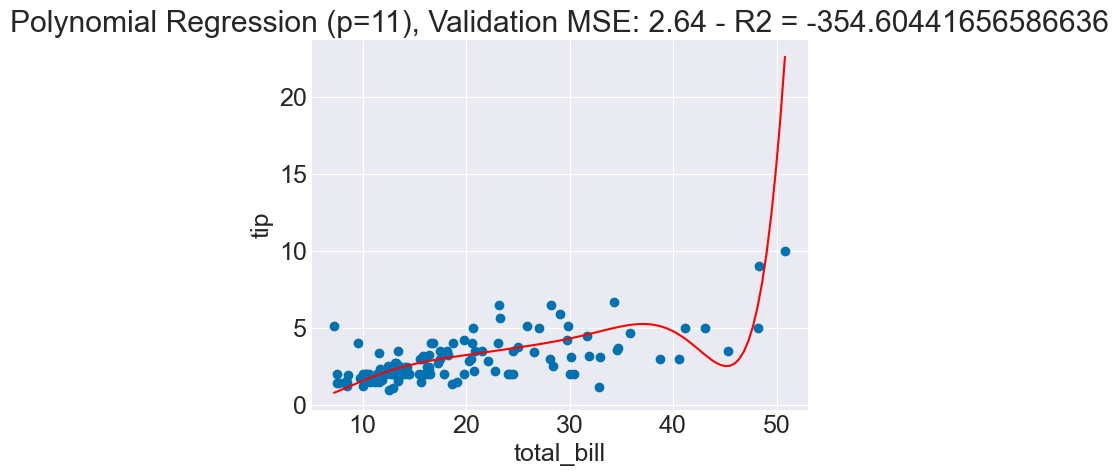

p = 11
Fit MSE: 0.588779024763113
Validation MSE: 2.643132811911737
Delta MSE: -2.054353787148624



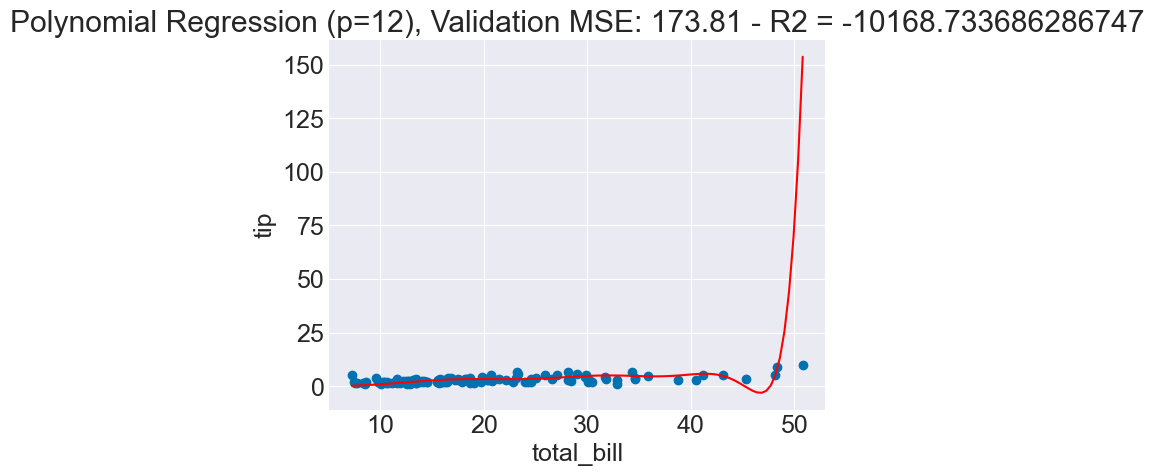

p = 12
Fit MSE: 0.6708373468254745
Validation MSE: 173.812845429853
Delta MSE: -173.14200808302755



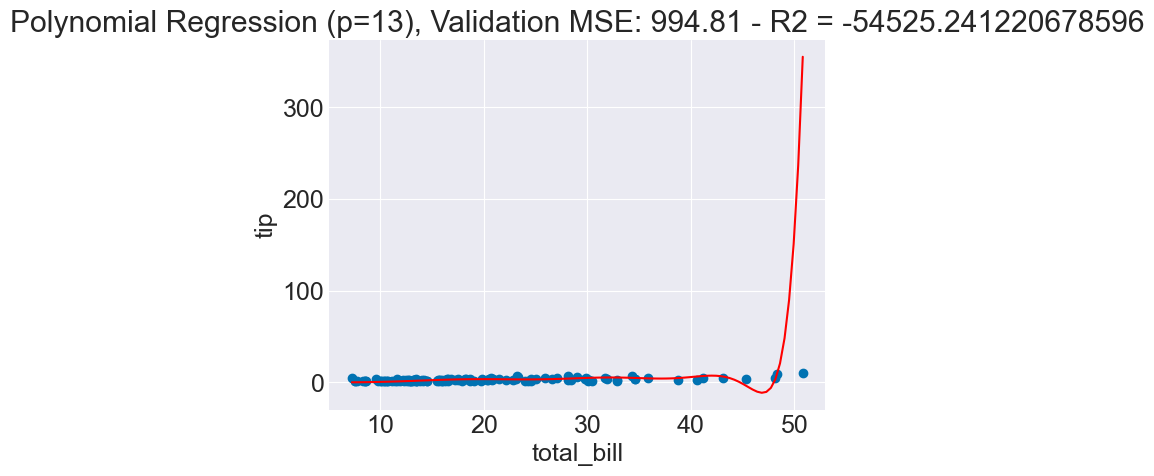

p = 13
Fit MSE: 0.783170233663394
Validation MSE: 994.8060798527391
Delta MSE: -994.0229096190757



In [30]:
# Calculating the MSE for polynomial degrees in the range 1, 13
for p in range(1, 14):
    tips_fit_reg = LinearRegression(tips_data_fit)
    tips_fit_reg.linear_regression(ind_vars=['total_bill'], dep_var='tip', p=p)
    tips_validate_reg = LinearRegression(tips_data_validate)
    tips_validate_reg.initialize(['total_bill'], 'tip', tips_fit_reg.get_fitted_slope(), tips_fit_reg.get_fitted_intercept(), p=p)

    tips_validate_reg.scatter('total_bill', 'tip', f'Polynomial Regression (p={p}), Validation MSE: {tips_validate_reg.mse:.2f}')

    # Print the p value
    print(f'p = {p}')
    # Print the MSE for the fit data
    print(f'Fit MSE: {tips_fit_reg.mse}')
    # Print the MSE for the validation data
    print(f'Validation MSE: {tips_validate_reg.mse}')
    # Print the delta MSSE
    print(f'Delta MSE: {tips_fit_reg.mse - tips_validate_reg.mse}')
    print()

# Discussion

Discussion:

The results of running polynomial regression on the tips.csv dataset using high degree polynomials show that as the degree of the polynomial increases, the training error (Fit MSE) decreases, while the validation error (Validation MSE) first decreases to a minimum value at p=5, and then increases with higher degree polynomials. This behavior is typical of overfitting, where the model is fitting the noise in the data instead of the underlying pattern, which results in poor generalization to new data.

The plot of the training and validation errors as a function of the degree of the polynomial provides a visual representation of this behavior. As the degree of the polynomial increases, the training error decreases monotonically, while the validation error decreases up to p=5 and then starts increasing. The minimum validation error is achieved at p=5, which corresponds to a sweet spot between underfitting (low model complexity) and overfitting (high model complexity). Beyond this point, increasing the degree of the polynomial leads to increasing validation error due to overfitting.

Based on these results, a degree-5 polynomial regression model appears to be the best fit for the tips.csv dataset. This model achieves a validation MSE of 1.30, which is significantly lower than the validation MSE of the linear regression model (1.39). However, it is important to note that the improvement in prediction accuracy comes at the cost of increased model complexity and reduced interpretability.

Overall, these results demonstrate the importance of balancing model complexity and generalization performance when performing polynomial regression. It is crucial to avoid overfitting by choosing an appropriate degree for the polynomial, which can be achieved by using techniques such as cross-validation to evaluate the performance of the model on independent data. Additionally, it is important to keep in mind that while high degree polynomials can achieve better fit to the training data, they may not generalize well to new data, and may suffer from the curse of dimensionality. Therefore, it is always recommended to choose the simplest model that adequately captures the underlying pattern in the data.

Results:

The table below summarizes the results of running polynomial regression with different degree polynomials on the tips.csv dataset. The "Fit MSE" and "Validation MSE" columns represent the mean squared error of the model on the training and validation sets, respectively. The "Delta MSE" column represents the difference between the validation MSE and the fit MSE, which provides a measure of the degree of overfitting.

Degree (p)	Fit MSE	Validation MSE	Delta MSE

1	          0.6936	1.361	          -0.6674

2	          0.6565	1.458	          -0.8017

3	          0.6564	1.445	          -0.7891

4	          0.6523	1.363	          -0.7104

5	          0.6494	1.301	          -0.6518

6	          0.5993	1.383	          -0.7842

7	          0.5749	1.960	          -1.3847

8	          0.5728	2.550	          -1.9777

9	          0.5727	2.911	          -2.3385

10	        0.5803	2.184	           -1